In [1]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import DBSCAN

In [2]:
df=pd.read_csv('iris.csv',sep=';',decimal=',')

In [3]:
df1=df.drop('species',1) #убираю столбце с классами

In [4]:
scaler = StandardScaler() #стандартизация данных
scaled_df1 = scaler.fit_transform(df1)
df_scaled=pd.DataFrame(scaled_df1,columns =np.array(df1.columns))

# LOF(novelty=False)

In [5]:
lof = LocalOutlierFactor(novelty=False)
lof1=lof.fit_predict(df_scaled)
lof1

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [6]:
#аномальные элементы,полученные при помощи LOF
anomalies_lof=np.where(lof1==-1)
df.iloc[anomalies_lof]

,species,seplen,sepw,petlen,petw
15,1,5.7,4.4,1.5,0.4
33,1,5.5,4.2,1.4,0.2
41,1,4.5,2.3,1.3,0.3
117,3,7.7,3.8,6.7,2.2
118,3,7.7,2.6,6.9,2.3
131,3,7.9,3.8,6.4,2.0


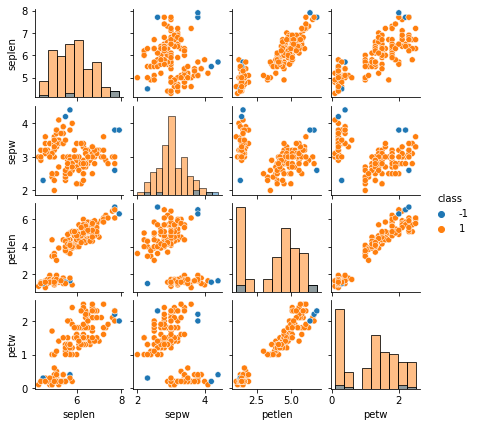

In [7]:
df_lof=df1
df_lof['class']=lof1
pair=sns.pairplot(df_lof, hue="class",diag_kind="hist",height=1.5,palette="tab10")

# LOF(novelty=True)

"When novelty is set to True be aware that you must only use predict on new unseen data and not on the training samples as this would lead to wrong results"

Поэтому разобьем наши данные на обучающую и тестовую выборку. И сделаем predict для тестовой.

In [8]:
df_new=df_scaled.sample(frac=1) #перемешаем данные

df_train=df_new.iloc[:int(df_new.shape[0]*0.67)]
df_test=df_new.iloc[int(df_new.shape[0]*0.67):]

lof2 = LocalOutlierFactor(novelty=True)
lof2.fit(df_train)
res=lof2.predict(df_test)
res

array([ 1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [9]:
#аномальные элементы,полученные при помощи LOF
anomalies_lof2=np.where(res==-1)
df_test.iloc[anomalies_lof2]

,seplen,sepw,petlen,petw
41,-1.627688,-1.744778,-1.398138,-1.181504
118,2.249683,-1.050569,1.786341,1.447956
33,-0.416010,2.651878,-1.341272,-1.312977


<ipython-input-10-0ab3a849a57c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lof2['class']= res


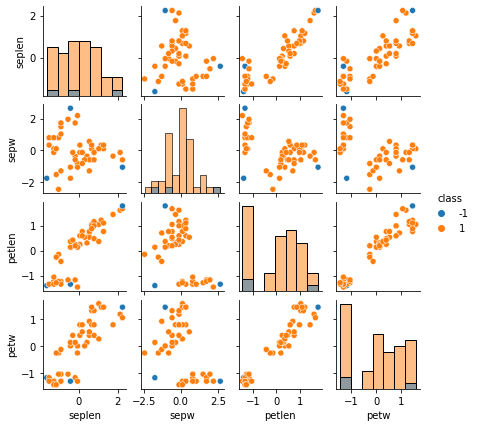

In [10]:
df_lof2=df_test
df_lof2['class']= res
pair=sns.pairplot(df_lof2, hue="class",diag_kind="hist",height=1.5,palette="tab10")

# DBSCAN

In [11]:
db = DBSCAN(eps=0.8).fit(df_scaled)
db.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [12]:
#аномальные элементы,полученные при помощи DBSCAN
anomalies_db=np.where(db.labels_==-1)
df.iloc[anomalies_db]

,species,seplen,sepw,petlen,petw
41,1,4.5,2.3,1.3,0.3
109,3,7.2,3.6,6.1,2.5
117,3,7.7,3.8,6.7,2.2
131,3,7.9,3.8,6.4,2.0


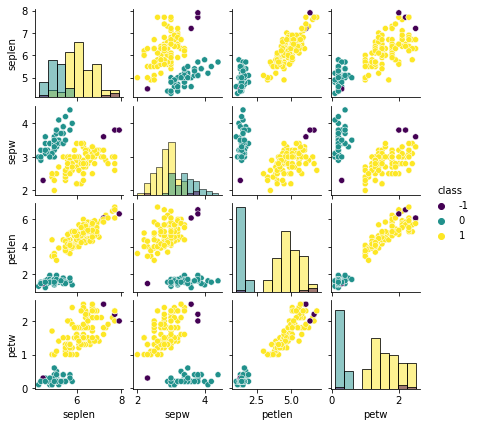

In [13]:
df_db=df1
df_db['class']=db.labels_
sns.color_palette("hls", 8)
pair=sns.pairplot(df_db, hue="class",diag_kind="hist",height=1.5,palette="viridis")

# Сравнение

Сравним количество аномалий и рассмотрим их:

In [14]:
print('Количество аномалий:',len(anomalies_lof[0]))
df.iloc[anomalies_lof] # LOF(novelty=False)

Количество аномалий: 6


,species,seplen,sepw,petlen,petw
15,1,5.7,4.4,1.5,0.4
33,1,5.5,4.2,1.4,0.2
41,1,4.5,2.3,1.3,0.3
117,3,7.7,3.8,6.7,2.2
118,3,7.7,2.6,6.9,2.3
131,3,7.9,3.8,6.4,2.0


In [15]:
print('Количество аномалий:',len(anomalies_db[0]))
df.iloc[anomalies_db] # LOF(novelty=False)

Количество аномалий: 4


,species,seplen,sepw,petlen,petw
41,1,4.5,2.3,1.3,0.3
109,3,7.2,3.6,6.1,2.5
117,3,7.7,3.8,6.7,2.2
131,3,7.9,3.8,6.4,2.0


 Стоит отметить что элементы под номерами 41, 117, 131 были определены двумя разными алгоритмами как аномалии